# **Install and import necessary library**





In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym
import numpy as np
import random
import time

# **Q-learning and Sarsa algorithm implemetation**

In [ ]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                break

        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
  q_table = np.zeros((env.observation_space.n, env.action_space.n))
  rewards_all = []

  for episode in range(num_episodes):
    state, _ = env.reset()

    reward_episode = 0.0
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

    if random.uniform(0, 1) < epsilon:
      a = env.action_space.sample()
    else:
      a = np.argmax(q_table[state, :])

    for step in range(num_steps_per_episode):
      state_comma, reward, terminated, truncated, _ = env.step(a)

      exploration = random.uniform(0, 1)

      if exploration < epsilon:
        a_comma = env.action_space.sample()
      else:
        a_comma = np.argmax(q_table[state_comma, :])

      q_table[state, a] = q_table[state, a] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[state_comma, a_comma])

      reward_episode += reward
      state = state_comma
      a = a_comma

      if terminated or truncated:
        break
    rewards_all.append(reward_episode)
  print(f'Episode {episode} finish')
  return q_table, rewards_all

# **Hyperparameters for each environment**

In [ ]:
# FrozenLake-v1
gamma_FL = 0.99
learning_rate_FL = 0.1
max_epsilon_FL = 1.0
min_epsilon_FL = 0.01
epsilon_decay_rate_FL = 0.005
num_episodes_FL = 20000
num_steps_per_episode_FL = 100

# FrozenLake8x8-v1
gamma_FL8x8 = 0.9
learning_rate_FL8x8 = 0.8
max_epsilon_FL8x8 = 1.0
min_epsilon_FL8x8 = 0.00141592654
epsilon_decay_rate_FL8x8 = 0.000053432
num_episodes_FL8x8 = 275000
num_steps_per_episode_FL8x8 = 200

# Taxi-v3
gamma_TX = 0.40362307497725447
learning_rate_TX = 0.9500785583657467
max_epsilon_TX = 0.8
min_epsilon_TX = 0.001
epsilon_decay_rate_TX = 0.1
num_episodes_TX = 20000
num_steps_per_episode_TX = 200

# **Hyperparameters tuning**

In [ ]:
!pip install scikit-optimize

In [ ]:
# Bayesian optimization for Hyperparameters tuning
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

space = [
    Real(0.1, 2.0, name='learning_rate'),
    Real(0.1, 2.0, name='gamma'),
    Real(0.8, 2.0, name='max_epsilon'),
    Real(0.001, 0.2, name='min_epsilon'),
    Real(0.00001, 0.1, name='epsilon_decay_rate')
]

env = gym.make('Taxi-v3', render_mode="rgb_array")

@use_named_args(space)
def objective(**params):
  learning_rate = params['learning_rate']
  gamma = params['gamma']
  max_epsilon = params['max_epsilon']
  min_epsilon = params['min_epsilon']
  epsilon_decay_rate = params['epsilon_decay_rate']

  total_reward = 0
  num_steps_per_episode = 200
  num_episodes = 5000

  _, total_reward = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

  average_reward = np.sum(total_reward) / num_episodes
  return -average_reward

res = gp_minimize(objective, space, n_calls=100, random_state=0)
print("Best hyperparameters found: ", res.x)
print("Best score: ", res.fun)

learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate = res.x
print(f'learning_rate: {learning_rate}, gamma: {gamma}, max_epsilon: {max_epsilon}, min_epsilon: {min_epsilon}, epsilon_decay_rate: {epsilon_decay_rate}')

<ipython-input-40-74567a27c584>:20: RuntimeWarning: overflow encountered in scalar multiply
  q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))
<ipython-input-40-74567a27c584>:20: RuntimeWarning: invalid value encountered in scalar add
  q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))


Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 49

<ipython-input-40-74567a27c584>:20: RuntimeWarning: overflow encountered in scalar multiply
  q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))


Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished


<ipython-input-40-74567a27c584>:20: RuntimeWarning: overflow encountered in scalar multiply
  q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))


Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished


<ipython-input-40-74567a27c584>:20: RuntimeWarning: overflow encountered in scalar multiply
  q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))


Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Episode 4999 finished
Best hyperparameters found:  [0.9500785583657467, 0.40362307497725447, 0.8, 0.001, 0.1]
Best score:  -2.5624
learning_rate: 0.9500785583657467, gamma: 0.40362307497725447, max_epsilon: 0.8, min_epsilon: 0.001, epsilon_decay_rate: 0.1


# **Playing**

In [ ]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [ ]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [ ]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

# **Draw Diagram**

In [ ]:
def draw_diagram(q_learning_rewards, sarsa_rewards, env_name, window=100):
  average_y = []
  for ind in range(len(q_learning_rewards) - window + 1):
    average_y.append(np.mean(q_learning_rewards[ind:ind+window]))

  for ind in range(window - 1):
      average_y.insert(0, np.nan)

  average_y_sarsa = []
  for ind in range(len(sarsa_rewards) - window + 1):
    average_y_sarsa.append(np.mean(sarsa_rewards[ind:ind + window]))

  for ind in range(window - 1):
    average_y_sarsa.insert(0, np.nan)

  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
  plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='darkgreen', label='SARSA')
  plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
  plt.grid()
  plt.title(env_name, color='red')
  plt.xlabel('Episodes')
  plt.ylabel(f'Average over {window} episodes')
  plt.legend()
  plt.show()

# **FrozenLake-v1 Environment**

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Using Q-learning algorithm
q_table, rewards_all = q_learning(env, num_episodes_FL, num_steps_per_episode_FL, learning_rate_FL, gamma_FL, max_epsilon_FL, min_epsilon_FL, epsilon_decay_rate_FL)

print(q_table)

Episode 19999 finished
[[0.53212386 0.46674044 0.48288598 0.47344753]
 [0.17731489 0.32737689 0.20031116 0.43869272]
 [0.34822798 0.24155444 0.23677853 0.22000446]
 [0.00582107 0.10224441 0.00604905 0.00310815]
 [0.5575446  0.30474079 0.329978   0.31023254]
 [0.         0.         0.         0.        ]
 [0.25567404 0.13971352 0.16144802 0.14784609]
 [0.         0.         0.         0.        ]
 [0.28873027 0.43403385 0.31719551 0.59481344]
 [0.38412651 0.65189864 0.46444589 0.37912137]
 [0.64661421 0.25928972 0.38077925 0.2385972 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.41661587 0.59690069 0.80014394 0.41541384]
 [0.70525189 0.89911605 0.71265777 0.71098343]
 [0.         0.         0.         0.        ]]


In [ ]:
# Using Sarsa algorithm
q_table_sarsa, rewards_all_sarsa = sarsa(env, num_episodes_FL, num_steps_per_episode_FL, learning_rate_FL, gamma_FL, max_epsilon_FL, min_epsilon_FL, epsilon_decay_rate_FL)

print(q_table_sarsa)

Episode 19999 finish
[[0.44129522 0.44118606 0.43718805 0.43923977]
 [0.28634212 0.2073705  0.21141004 0.37858938]
 [0.31867462 0.23552698 0.26174029 0.28530221]
 [0.18704029 0.00715378 0.0134026  0.03050505]
 [0.44774502 0.41471538 0.31933761 0.40158626]
 [0.         0.         0.         0.        ]
 [0.10893159 0.12442865 0.23547601 0.05099225]
 [0.         0.         0.         0.        ]
 [0.37070022 0.44637282 0.37264384 0.47310492]
 [0.40842627 0.52778265 0.41033388 0.38621573]
 [0.44960083 0.35473286 0.34583124 0.19878975]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.4444324  0.47463405 0.67398073 0.43771798]
 [0.6549495  0.8388296  0.70886633 0.707896  ]
 [0.         0.         0.         0.        ]]


In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 746/1000
Average number of steps: 36.67828418230563


In [ ]:
play_multiple_times(env, q_table_sarsa, 1000)

Number of successes: 745/1000
Average number of steps: 38.21744966442953


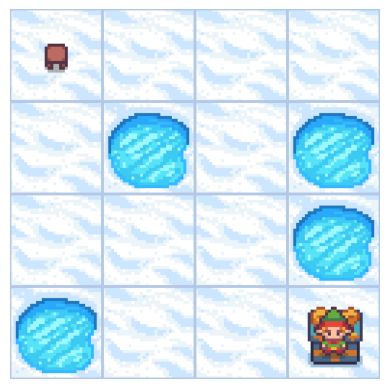

(1.0, 23)

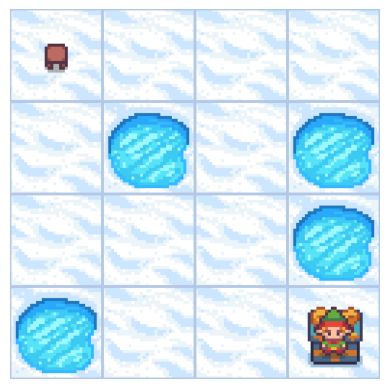

In [ ]:
play(env, q_table, render=True)

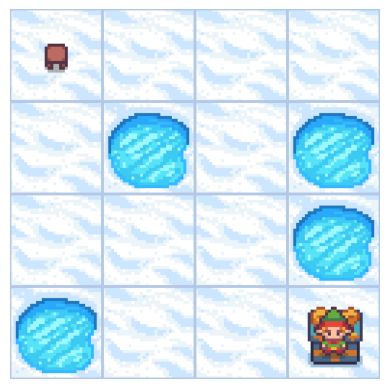

(1.0, 22)

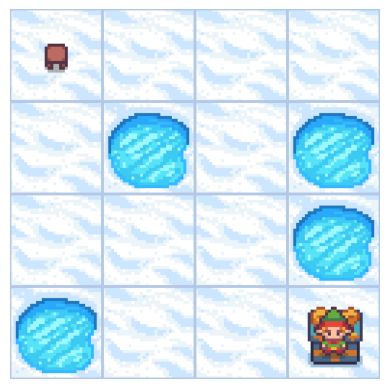

In [ ]:
play(env, q_table_sarsa, render=True)

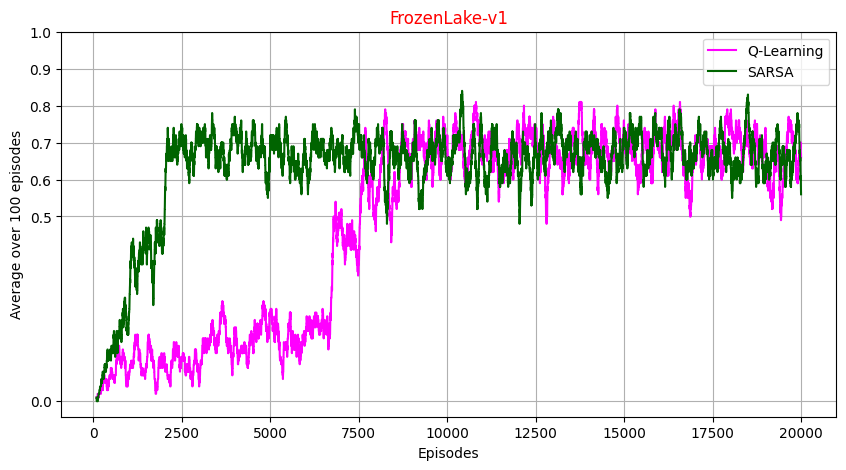

In [ ]:
draw_diagram(rewards_all, rewards_all_sarsa, 'FrozenLake-v1')

# **FrozenLake8x8-v1 Environment**

In [ ]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Using Q-learning algorithm
q_table, rewards_all = q_learning(env, num_episodes_FL8x8, num_steps_per_episode_FL8x8, learning_rate_FL8x8, gamma_FL8x8, max_epsilon_FL8x8, min_epsilon_FL8x8, epsilon_decay_rate_FL8x8)

print(q_table)

Episode 274999 finished
[[2.19263594e-04 1.92718322e-03 2.28545781e-04 2.27583606e-04]
 [2.45412866e-04 9.68161452e-05 3.37019716e-03 2.45237175e-04]
 [4.14241357e-04 1.28716501e-03 3.24073703e-03 4.06034622e-04]
 [5.55991233e-04 5.74445564e-03 1.76253826e-03 5.94612877e-04]
 [8.13407868e-04 4.28024252e-03 9.87421104e-03 9.36592973e-04]
 [1.40230222e-03 1.41137515e-03 2.67724948e-02 4.96323036e-03]
 [1.58866839e-03 4.84060553e-02 2.01278526e-03 1.97032235e-03]
 [1.47789468e-03 2.60783575e-03 4.09926389e-02 2.58030520e-03]
 [9.58488214e-04 2.48979676e-04 4.14684418e-04 1.97456033e-03]
 [3.42670763e-04 4.85781739e-04 1.56967697e-04 2.14059055e-03]
 [1.32657530e-03 1.27716389e-03 3.90752770e-04 3.24641818e-03]
 [1.48758180e-04 2.72136486e-04 2.47019856e-04 7.17710241e-03]
 [7.42320904e-04 7.60725627e-04 5.73980361e-04 7.73496865e-03]
 [1.06489277e-03 4.61399838e-04 9.52131554e-03 1.15141543e-03]
 [1.26956669e-02 8.50661008e-03 9.11205670e-02 2.22215278e-03]
 [1.01741989e-01 1.05639279e-02

In [ ]:
q_table_sarsa, rewards_all_sarsa = sarsa(env, num_episodes_FL8x8, num_steps_per_episode_FL8x8, learning_rate_FL8x8, gamma_FL8x8, max_epsilon_FL8x8, min_epsilon_FL8x8, epsilon_decay_rate_FL8x8)

print(q_table_sarsa)

Episode 274999 finish
[[1.09747490e-04 1.22101254e-03 1.06600015e-04 1.14298105e-04]
 [1.57247891e-04 2.38821995e-03 7.88163220e-04 1.46789358e-04]
 [8.39929794e-04 5.59971025e-03 2.62670864e-04 4.44341660e-04]
 [5.27503088e-04 4.02415261e-04 1.12181229e-02 5.79687162e-04]
 [8.90154218e-04 9.73065558e-04 8.97948434e-04 8.58036691e-03]
 [1.32052893e-03 1.91287432e-03 1.25299740e-02 1.28408502e-03]
 [1.36974759e-03 1.95649049e-03 1.47157773e-02 2.20712486e-03]
 [2.21984756e-03 2.92933641e-02 2.34351522e-03 2.15870450e-03]
 [1.42829550e-03 1.05837870e-04 1.10156458e-04 1.06134103e-03]
 [9.12879834e-05 5.50772231e-04 8.62060052e-05 4.86059149e-03]
 [1.13908394e-04 1.18217271e-04 1.57767510e-03 3.99167753e-03]
 [1.23353967e-04 1.54440807e-08 1.62739335e-04 8.06058057e-03]
 [6.63257201e-04 7.70189673e-04 9.16664076e-03 9.74094761e-04]
 [9.74563689e-04 1.72619673e-03 7.51546044e-03 1.58155163e-03]
 [1.22409436e-03 1.82832651e-02 2.14593169e-03 1.77631430e-03]
 [5.29293035e-02 1.98232890e-03 2

In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 739/1000
Average number of steps: 81.97428958051421


In [ ]:
play_multiple_times(env, q_table_sarsa, 1000)

Number of successes: 685/1000
Average number of steps: 94.77372262773723


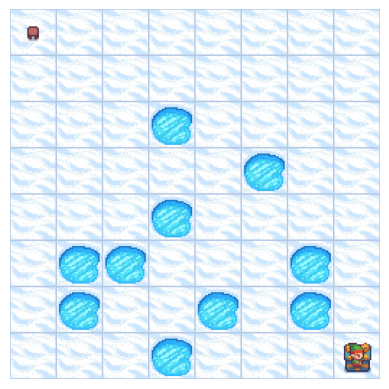

(1.0, 119)

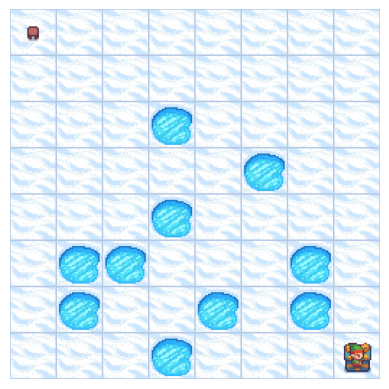

In [ ]:
play(env, q_table, render=True)

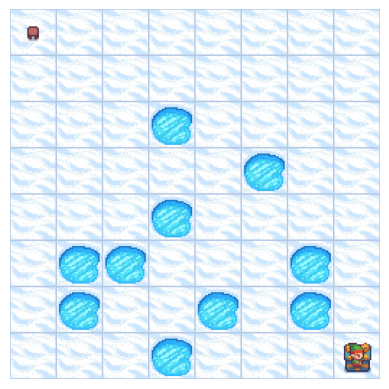

(1.0, 72)

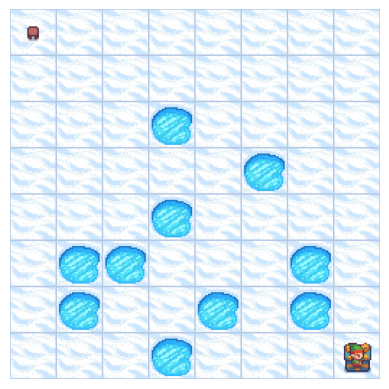

In [ ]:
play(env, q_table_sarsa, render=True)

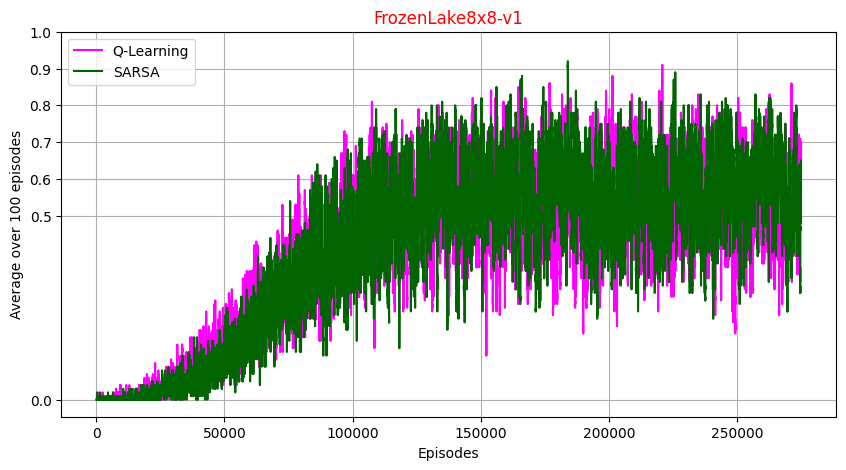

In [ ]:
draw_diagram(rewards_all, rewards_all_sarsa, 'FrozenLake8x8-v1')

# **Taxi-v3 Environment**

In [ ]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
q_table, rewards_all = q_learning(env, num_episodes_TX, num_steps_per_episode_TX, learning_rate_TX, gamma_TX, max_epsilon_TX, min_epsilon_TX, epsilon_decay_rate_TX)

print(q_table)

Episode 19999 finished
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.67575763  -1.67438347  -1.6759312   -1.67588735  -1.67062909
   -9.50078558]
 [ -1.63833962  -1.58323756  -1.62686234  -1.65282636  -1.4445851
   -9.50078558]
 ...
 [ -1.65115303  -1.10148584  -1.65115303  -1.65100679  -9.50078558
  -10.42114665]
 [ -1.67470477  -1.67242195  -1.67470477  -1.66154923 -10.33940857
   -9.50078558]
 [ -1.36183792  -0.28644814  -0.95007856  -0.99750785  -9.50078558
   -9.50078558]]


In [ ]:
q_table_sarsa, rewards_all_sarsa = q_learning(env, num_episodes_TX, num_steps_per_episode_TX, learning_rate_TX, gamma_TX, max_epsilon_TX, min_epsilon_TX, epsilon_decay_rate_TX)

print(q_table_sarsa)

Episode 19999 finished
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.67584013  -1.67588735  -1.67581586  -1.67588735  -1.67062909
   -9.50078558]
 [ -1.66404383  -1.65115303  -1.6514095   -1.58646679  -1.4445851
  -10.52903879]
 ...
 [ -1.65115303  -1.62543925  -1.62168743  -1.64388845  -9.50078558
   -9.50078558]
 [ -1.67229043  -1.6721596   -1.67197612  -1.67232402 -10.33940857
  -10.33940857]
 [ -1.36183792  -1.36183792  -0.99987559   7.05246575 -10.33940857
   -9.50078558]]


In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 1000/1000
Average number of steps: 13.036


In [ ]:
play_multiple_times(env, q_table_sarsa, 1000)

Number of successes: 1000/1000
Average number of steps: 13.204


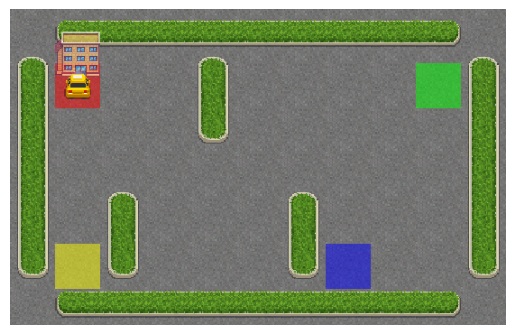

(11, 10)

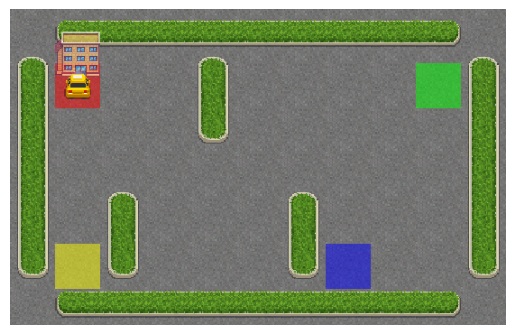

In [ ]:
play(env, q_table, render=True)

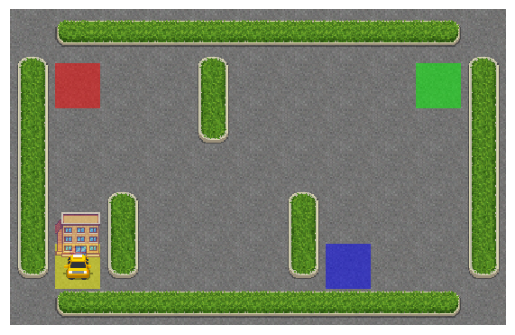

(11, 10)

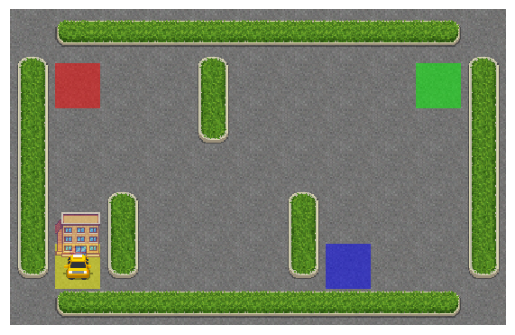

In [ ]:
play(env, q_table_sarsa, render=True)

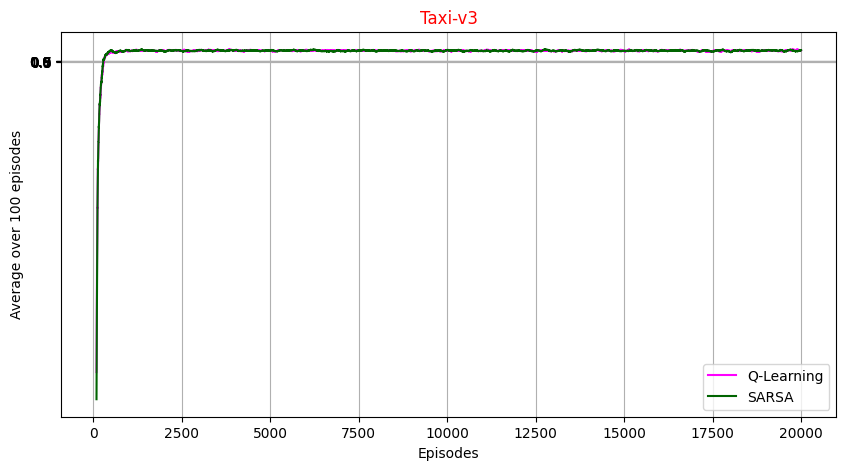

In [ ]:
draw_diagram(rewards_all, rewards_all_sarsa, 'Taxi-v3')

# Nhận xét:

*   Nhìn chung, cả hai thuật toán Q-learning và SARSA đều tìm được những chính sách (policy) tốt cho bài toán (ở đây là các môi trường trò chơi) sau một thời gian học thích hợp.
*   Thời điểm bắt đầu ổn định của cả 2 thuật toán khá tương đồng nhau (nhận định này dựa vào kết quả sau nhiều lần thử ở cả 3 môi trường).


*   Tuy nhiên, từ kết quả cuối cùng của mỗi môi trường (khi ta chơi nhiều lần), ta có thể thấy với thuật toán Q-learning, tỉ lệ thắng cao hơn và số bước đi trung bình nhỏ hơn so với thuật toán SARSA.



